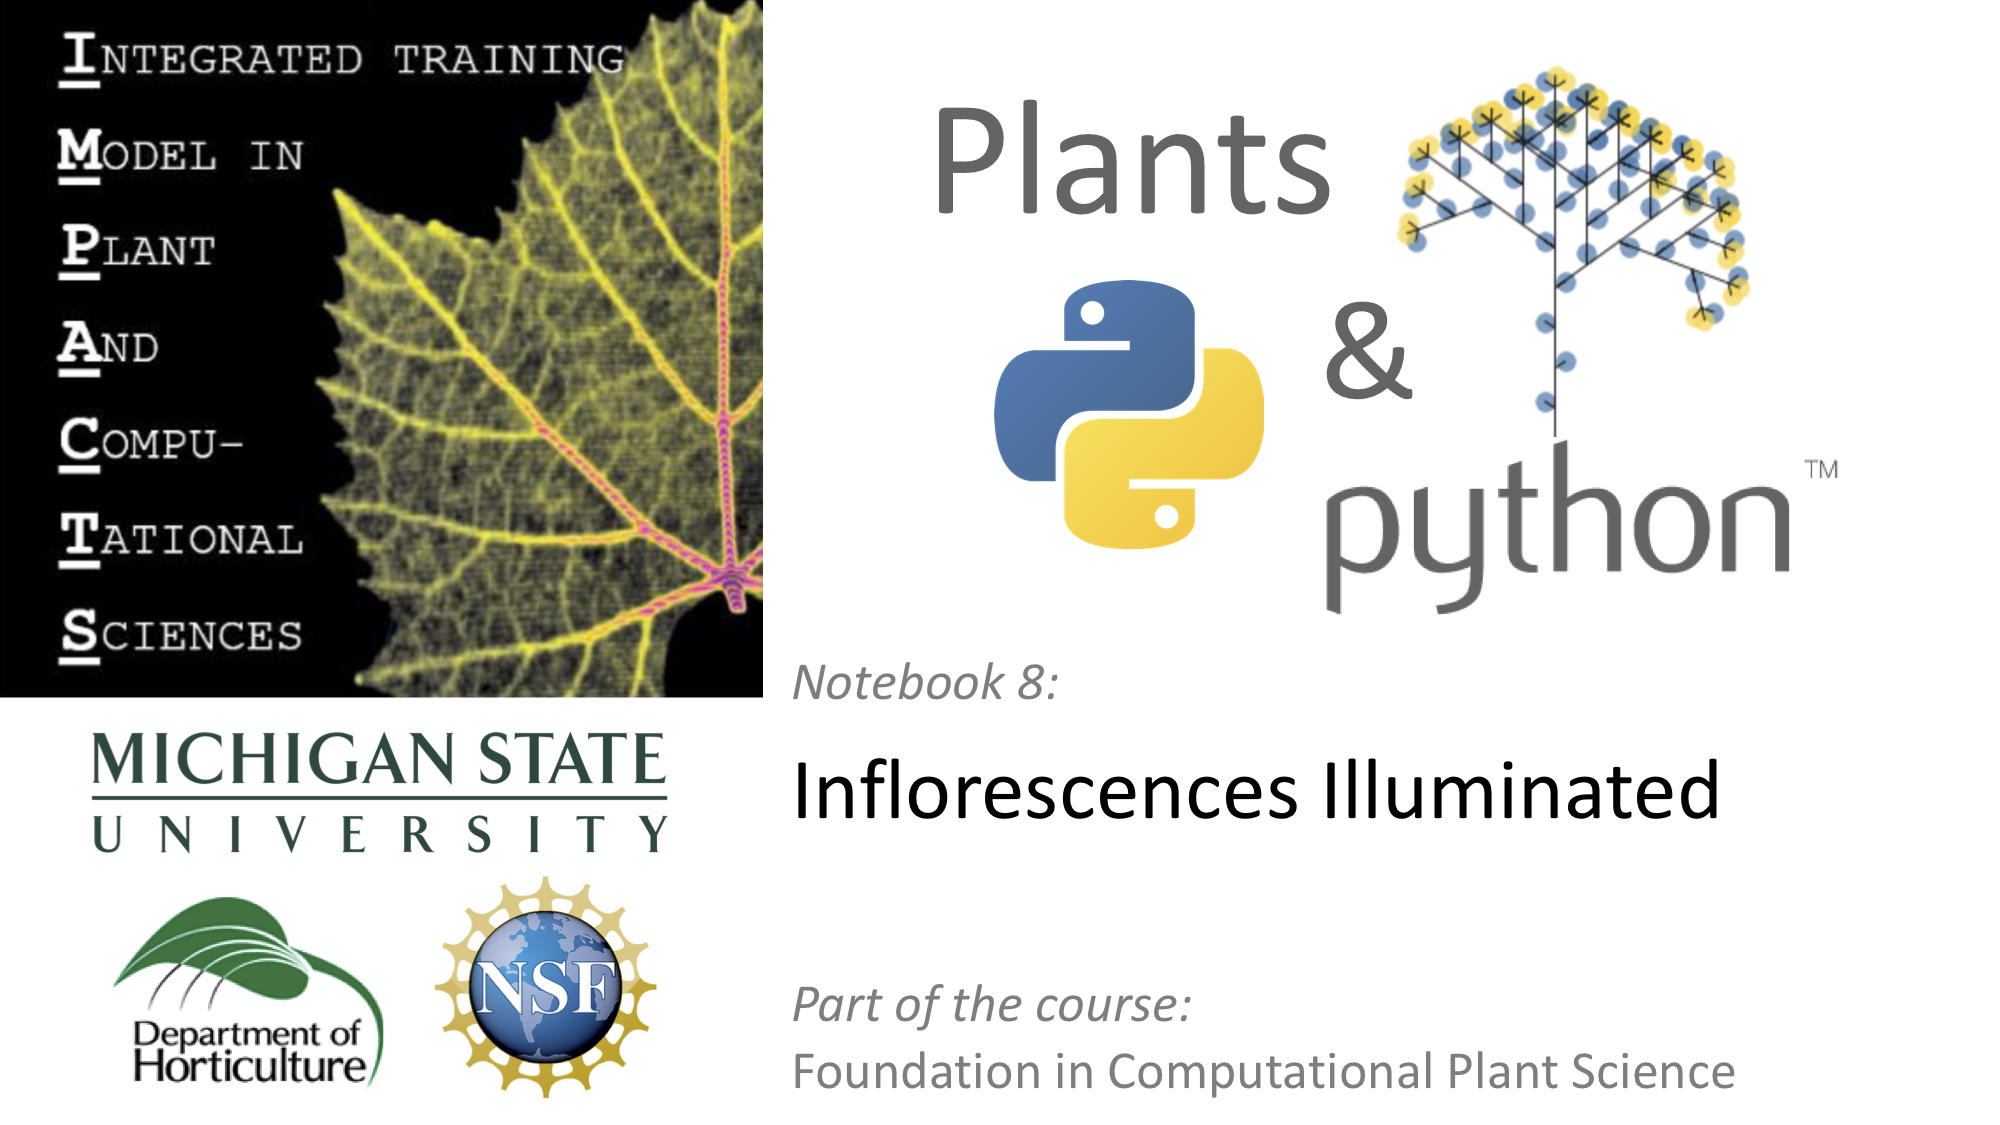

___
# Inflorescences Illuminated

In the previous notebook, we modeled the transition to flowering. Our models focussed on the transition and not the morphology, which was boring: no branching and only leaves until a single terminal flower was produced.

Here, we will be focusing on the morphology of inflorescences, branching clusters of flowers. We will explore how L-systems can model the intricate branching patterns of racemes, cymes, thyrsi, and panicles. We will learn about two main types of plant growth patterns: monopodial and sympodial.

After creating sequences for these branching patterns, we will make diagrams. When the text of a manuscript is supplmented with illustrations, it is called an "illuminated manuscript". L-systems strings are a type of text, representing complex inflorescence architectures. We will need a function to plot them! They need to be illuminated! 

This notebook is based off of [Chapter 3, Sections 3.2 - 3.3: Developmental models of herbaceous plants](http://algorithmicbotany.org/papers/abop/abop-ch3.pdf) from *The Algorithmic Beauty of Plants* (Przemyslaw Prusinkiewicz and Aristid Lindenmayer, Springer-Verlag, 1990, ISBN 978-0-387-97297-8). The code used in this notebook is adapted from Paul Butler's [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/) tutorial.

___
## Racemes

The simplest inflorescence architecture resembles how we have been modeling plant development so far: a meristem at the shoot apex iteratively produces internodes and nodes, in which each node consists of a leaf and an axillary meristem. The axillary meristem may or may not produce a branch. The difference with a raceme is that flowers are produced at each node after the reproductive transition. This type of growth, in which a single shoot apical meristem at the tip of a shoot continuously produces nodes, is called a ***monopodial growth habit***. In monopodial growth, a shoot is derived from the activity of a single meristem. Branches may develop from axillary meristems on the main shoot, and they may or may not exhibit monopodial growth as well. The term ***monopodial*** refers to the growth habit of a shoot or branch when its components are derived from a single meristem at the tip. Racemes exhibit only monopodial growth. Racemes may be unbranching or branching.

In this notebook we will be writing code to model the growth of racemes, cymes, thyrsi, and panicles. Each type of inflorescence has a fundamentally different type of growth habit. Like in the last lesson, we will be using L-systems and production rules to model the development of these different inflorescence types. Like last notebook, too, there are a series of ***transitions***. However, there are many more transitions that the vegetative-to-flowering transition we modeled last lesson! For example, racemes have a set of vegetative, branching, floral, and terminal transformations.

Below, code to transform an axiom multiple times using different sets of production rules for a raceme is provided. Like our models of flowering, which incorporated chance or in which transition times were modelled, there is no set number of iterations, per se. Rather, we will be modeling transitions in this lesson a lot like the "leaf counting" model from last lesson. For each set of transitions, there will be a "leaf limit", "branching limit", or "flowering limit", counting the number of nodes for each set of transformations before transitioning to the next. The code involves a series of while loops and counters for each set of transformations.

Code to produce a raceme, given a set of transformations and "limits" counting nodes for each set of production rules is provided. You will be creating similar functions for cymes, thyrsi, and panicles later.

Study this function and understand how it works.

In [1]:
def raceme_transform_multiple(sequence, leaflimit, branchlimit, flowerlimit):
    
    vegetative_transformations = {'a': 'In[L]a'}
    
    branch_transformations = {'a': 'In[L]A', 
                              'A': 'In[L]{[b]}A', 
                              'b': 'In[L]B', 
                              'B': 'In[K]B'}
    
    floral_transformations = {'A': 'In[L][b]B', 
                              'B': 'In[K]B'}
    
    terminal_transformations = {'B': 'n[K]', 
                                'a': 'n[K]', 
                                'A': 'n[K]', 
                                'b': 'n[K]'}
    
    leaves = 0
    
    while leaves <= leaflimit:

        sequence = ''.join(vegetative_transformations.get(c, c) for c in sequence)
        leaves += 1
        
    branches = 0
    
    while branches <= branchlimit:
    
        sequence = ''.join(branch_transformations.get(c, c) for c in sequence)
        branches += 1

    flowers = 0
    
    while flowers <= flowerlimit:
    
        sequence = ''.join(floral_transformations.get(c, c) for c in sequence)
        flowers += 1
    
    final_transform = ''.join(terminal_transformations.get(c, c) for c in sequence)
            
    return final_transform

Let's go through each set of production rules, one-by-one, to understand how to build a raceme, starting with the vegetative transformations:

```python
vegetative_transformations = {'a': 'In[L]a'}
```

The vegetative transformations should look very familiar to you! A vegetative meristem `a` iteratively produces internodes `I` and leaves `[L]`. For this notebook, we are adding an additional character, `n`, which stands for "node". Adding this marker for each node will help us draw our inflorescences later. The vegetative meristem `a` reproduces itself, each iteration, maintaining vegetative meristem activity.

The next set of production rules are the branching transformations:

```python
branch_transformations = {'a': 'In[L]A', 
                          'A': 'In[L]{[b]}A', 
                          'b': 'In[L]B', 
                          'B': 'In[K]B'}
```

The first production rule of the branching transformations converts the vegetative meristem `a` into a meristem that produces branches, `A`. We will be denoting branches arising from axillary meristems in this notebook as `{[ ]}`, which like `n` will assist us in plotting inflorescences. The "main branch" produced by meristem `A` will continue to produce phytomers with a branching axillary meristem `{[b]}` at each node. Note that in real life, the vegetative production rules also have axillary meristems that can give rise to branches, but by not indicating them, they never have the chance to branch in our models. Rather, by "transitioning" to a meristem capable of producing branches, we limit where in our inflorescence branches can arise. One an axillary branching meristem `{[b]}` is produced, it produces a non-branching, flowering branch itself. The first node of this new branch will have a leaf, as `b`:`In[L]B`, but after that node, successive flowers will be produced by the new meristem `B`, which transforms to `In[K]B`.

After branching, the next set of production rules are the flowering transformations:

```python
floral_transformations = {'A': 'In[L][b]B', 
                          'B': 'In[K]B'}
```

The main branch meristem `A` will be converted into a flowering meristem, `B`. The first production rule for this transformation set produces a branch `b` because a leaf `[L]` is subtending it, but because we are not in the branching transformations and the temrinal transformations are next, it will only produce a flower. Otherwise, all meristems, on branches or the main shoot, are converted to a meristem `B` that produces flowers `[K]` at each node.

And finally, the production rules of the terminal transformations:

```python
terminal_transformations = {'B': 'n[K]', 
                            'a': 'n[K]', 
                            'A': 'n[K]', 
                            'b': 'n[K]'}
```

With this set of production rules, ***all*** meristems terminate in a single flower.

Do this:
    
Although we are ultimately going to use the function above to plot out our inflorescences as diagrams, copy and paste `raceme_transform_multiple()` below. Call the new function `print_raceme()`. Leave this new function identical to the previous, except add `print(sequence)` as the last line of each of the three `while` loops. This will allow you to visualize each step as your inflorescence is created to understand how the production rules work together to create a raceme.

In [5]:
# Put the code for the function print_raceme() here:




Next, in the cell below, use your function `print_raceme()` to see how a raceme is constructed, step by step. Use the production rules to try to trace how the re-writing is occuring from one step to the next. Start with smaller `leaflimit`, `branchlimit`, and `flowerlimit` values and work your way up to more complicated raceme structures. Start with axiom = `a`.

In [7]:
# Use your function print_raceme() to study how a raceme is built using the production rules. 




____
## Cymes

Just as racemes exhibit a ***monopodial growth habit***, cymes have a ***sympodial growth habit.*** In fact, synonyms for monopodial and sympodial growth are ***racemose*** and ***cymose***. Sympodial growth is not as intuitive as monopodial growth. A shoot arising from a sympodial growth habit was produced by multiple meristems. In sympodial growth, a shoot apical meristem produces a few nodes and then the meristem terminates (often in a flower). However, the shoot continues to grow! One of the axillary meristems produced by the now terminated meristem will create a few nodes and then terminate as well. An axillary meristem produced by that meristem activates and produces a few nodes and the process continues. The result is that shoot growth is relayed from one meristem to the next, the main shoot apical meristem and an axillary meristem that it produced continuing to grow. Often sympodial growth results in a "zig-zag" or "spiral" growth habit. But this can't always be relied upon to determine if growth is monopodial or sympodial, and sometimes only microscopic, developmental study of the meristems themselves can reveal how a plant is growing.

The above may sound confusing if you're not used to tracking which plant parts are produced by which meristems. However, it might be easier to understand using L-systems productions rules. Below are production rules for the sets of transformations that model the growth of a cyme:

```python
vegetative_transformations = {'a': 'In[L]a'}

cyme_transformations = {'a': 'In[L]A', 
                        'A': 'In{[A]}K'}

terminal_transformations = {'a': 'n[K]', 
                            'A': 'n[K]'}
```

Like most plants that produce cymes, vegetative growth is still ***monopodial***, and the vegetative transformations for this model are the same as those for racemes. However, the ***sympodial*** growth is encoded in the cyme transformations. The vegetative meristem `a` transforms into a cyme-producing meristem `A`.  The new cyme-producing meristem `A` produces phytomers `In{[A]}K`. This unit ***terminates*** in a flower `K`. But note that it also produces a branch from an axillary meristem, `{[A]}`. The axillary meristem is going to repeat the ***same*** program recursively, `In{[A]}K`: that is, the branch produced by the axillary meristem is going to terminate in a flower `K` as well and recursively reproduce itself in another axillary meristem. The terminal transformations, as before, terminate all meristems in a flower `K`.

Using the transformation sets for a cyme, create a function `cyme_transform_multiple()`, like that for racemes.

In [9]:
# Put your function cyme_transform_multiple() here:




Now, copy and paste the function you just wrote, and create a new function `print_cyme()` in the cell below. Like the print function for racemes you created, write `print(sequence)` as the last line of each `while` loop.

In [11]:
# Put the code for the function print_cyme() here:




Now, try out your function `print_cyme()`! Again, start with lower leaf and cyme limits at first and work your way up. Observe the string and the brackets indicating branches. What do you notice about the brackets that is a consequence of sympodial growth? What happens as you increase the cyme limit? Can you follow the developmental progressions that the brackets model for sympodial growth?

In [13]:
# Put your answer here




____
## Thyrsi

A thyrsus (plural, thyrsi) has both ***monopodial*** and ***sympodial*** growth. The main shoot from which branches arise from axillary meristems is monopodial, while the branches are sympodial. Based on what you know about racemose and cymose growth habits, you should have no problem understanding how thyrsi develop!

The production rules for the transformations of a thyrsus are as follows:

```python
vegetative_transformations = {'a': 'In[L]a'}

branch_transformations = {'a': 'In[L]A', 
                        'A': 'In[L]{[B]}A',
                        'B': 'In[B]K'}

terminal_transformations = {'a': 'n[K]', 
                            'A': 'n[K]',
                            'B': 'n[K]'}
```


Like all our inflorescence models, the vegetative growth before the reproductive transition is monopodial and only produces leaves. After the transition to branching, the main shoot continues ***monopodial*** growth. Vegetative meristem `a` transitions to a branching meristem `A`. The branching meristem `A` produces the phytomer `In[L]{[B]}A`. Notice that this phyotomer is monopodial: meristem `A` continues to make copies of itself, producing leaves `[L]` and axillary meristems `{[B]}`.  But it is the axillary meristem `{[B]}` that produces a  ***sympodial*** branch. Axillary meristem `{[B]}` recursively produces `In[B]K`, in which the main meristem terminates as a flower `K` and the axillary meristem continues to reproduce `In[B]K`. In this way, the main shoot of a thyrsus is monopodial and the branches are sympodial. As always, the terminal transformations terminate all meristems in flowers.

In the cell below, create a `thyrsus_transform_multiple()` function the same as you have for racemes and cymes.

In [15]:
# Put your function thyrsus_transform_multiple() here:




Next, create a `print_thyrsus()` function as you have for racemes and cymes.

In [17]:
# Put the code for the function print_thyrsus() here:




Finally, try out your `print_thyrsus()` function to understand the production rules and how a thyrsus is built.

In [19]:
# Put your answer here




___
## Panicle

*The Algorithmic Beauty of Plants* uses the term ***polypodial*** to describe panicle morphology. Although not an accepted botanical term, it is accurate nonetheless! Panicle morphology is simple: if you can branch, do it! Panicles continue to branch along both their main and lateral axes. The longer the branching continues, the more ramified the panicle becomes.

The production rules for a panicle are below:

```python
vegetative_transformations = {'a': 'In[L]a'}

branch_transformations = {'a': 'In[L]A', 
                        'A': 'In[L]{[A]}A'}

terminal_transformations = {'a': 'n[K]', 
                            'A': 'n[K]'}
```

After studying the production rules underlying raceme, cyme, and thyrsus development, you should be able to pick out that the one production rule that makes panicle morphology unique is `A`: `In[L]{[A]}A`. The branching meristem `A` not only reproduces itself along the main branch axis, iteratively creating nodes, but it produces a branching axillary meristem `{[A]}` that will itself create a branching branch. Because the branches don't terminate until the terminal transformations, you should also be able to recognize that all growth in a panicle is ***monopodial***; it's just that a panicle will branch at every opportunity. Flowers are produced terminally with the final transformations.

Using the production rules for a panicle, write a `panicle_transformation_multiple()` function, the same as you have for racemes, cymes, and thyrsi.

In [21]:
# Put your function panicle_transform_multiple() here:




Now, create a `print_panicle()` function.

In [23]:
# Put the code for the function print_panicle() here:




Finally, try out your `print_panicle()` function to understand the production rules and how a panicle is built.

In [25]:
# Put you answer here:




____
## Illuminated inflorescences

We will be modifying the `branching_turtle_to_coords()` function from Paul Butler's [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/) to create a new function, `inflorescence_turtle()`, that draws inflorescence diagrams, similar to those in [Chapter 3](http://algorithmicbotany.org/papers/abop/abop-ch3.pdf) of *The Algorithmic Beauty of Plants*.

There is a lot to modify, and we will be modifying the function in several steps. Some of the biggest changes we will be doing in this first step are to:

* Add a way to interpret `n` in the string, which indicates a node. The node is important because we want the branches and lateral organs to alternate from side-to-side in our diagrams, and this character allows us to keep track of that. Everytime a `n` node is passed, we will use `*= -1` to change the sign of `node`.

* We remove `+` and `-` which would change the angle of the turtle. Instead, we will rely on `[` to indicate a branch or lateral organ and turn the angle by `turn_amount` (either positive or negative, depending on the sign of `node`).

* The code will be modified to recognize `I`, `L`, and `K` as internode, leaf, and flower.

* `plt.scatter()` will be used to draw leaves and flowers, in addition to drawing a small line away from the main stem for lateral organs.

These are extensive modifications! And perhaps they are not the most elegant. But we will use this opportunity to demonstrate that given good, working code that is appropriate, it can be modified for a new task (rather than starting from scratch!).

Implement the changes below! The original `branching_turtle_to_coords()` function is provided. Make a copy (in case something happens while editing!) and start making changes. Try to understand what is being done. 

After getting the new function to work, if you can think of ways to improve it or a different way to write it, go for it!

1. Name your function `inflorescence_turtle()` and in addition to `turtle_program` and `turn_amount`, provide `d` and `lateral_angle` as inputs.
  * `d` will be the length of the lateral organ line drawn.
  * `lateral_angle` is an angle, that when added to `angle`, is the angle lateral organs come off of their parent stem.

2. In addition to the list `saved_states`, the 3-tuple `state`, and the tuple `yield`, add another variable, `node`, at the beginning of your function. Set `node` equal to 1 initially. 

3. For the first `if` statement, instead of moving forward for any number of capital letters in the alphabet, only move forward for the character `I`, which corresponds to an internode. This will limit this `if` statement to producing internodes. If you like, you can also remove the `.lower()` function and make sure that captial `I` is specified.

4. Remove the `if` statement for lowercase letters. This is to move the turtle without drawing, and we do not require this function any longer.

5. Remove the `elif` statements that turn the turtle clockwise or counterclockwise upon encountering `+` and `-`. Our turtle programs no longer use these commands.

6. Add an `elif` statement in its place `elif command in "LK"`, for how to interpret leaves and flowers.
  * Create a nested `if` statement within the `elif` statement for `node > 0`
    * If `node > 0`, record state as `state = (x - d*cos( (angle + lateral_angle) * DEGREES_TO_RADIANS), y + d*sin( (angle + lateral_angle) * DEGREES_TO_RADIANS), angle)`
    * If `node > 0`, then plot a dot to represent the lateral organ using         `plt.scatter(x - d*cos( (angle + lateral_angle) * DEGREES_TO_RADIANS), y + d*sin( (angle + lateral_angle) * DEGREES_TO_RADIANS))`
    * `d` is the length of a lateral organ, like a leaf or flower, drawn as a line away from the stem
    * By using an angle of `angle + lateral_angle`, the angle of the branch is retained, and the lateral angle comes off in addition to this, so that you can see a leaf or flower diverging away from the stem by the value of `lateral_angle`
   * Create a nested `if` statement within the `elif` statement for `node < 0`
     * If `node < 0`, record state as `state = (x - d*cos( (angle - lateral_angle) * DEGREES_TO_RADIANS), y + d*sin( (angle - lateral_angle) * DEGREES_TO_RADIANS), angle)`
     * If `node < 0`, then plot a dot to represent the lateral organ using         `plt.scatter(x - d*cos( (angle - lateral_angle) * DEGREES_TO_RADIANS), y + d*sin( (angle - lateral_angle) * DEGREES_TO_RADIANS))`
     * By using an angle of `angle - lateral_angle`, the lateral organ is drawn on the opposite side of the branch than if `node > 0`. This is done to alternate the placement of successive lateral organs.
  * At the end of the `elif` statement, be sure to yield `yield (state[0], state[1])`
7. Add the statement `elif command == "n"`. Within the statement, add `node *= -1`. 
  * Everytime a node in the turtle program (denoted `n`) is reached, the sign of node will change using `*= -1`. This will allow lateral organs, like leaves and flowers, and branches to alternate which side they are drawn to create a readable inflorescence diagram.
8. Under the `elif comand == '['`, add the following:
  * `if node > 0: state = (x, y, angle + turn_amount)`
  * `elif node < 0: state = (x, y, angle - turn_amount)`
  * The above statements will create angled branches on different sides of the shoot depending on the sign of `node`
  * This takes the place of the function of `+` and `-`

In [ ]:
# Put your modified inflorescence_turtle() function here:




In [52]:
# An original copy of branching_turtle_to_coords() to go back to if something happens
# Copy this code in a new cell and then modify the copy to make your new function

from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state
        
        # Move forward (matches a-j and A-J)
        
        if command.lower() in 'abcdefghijklmnopqrstuvwxyz': 
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            # Add a break in the line if command matches a-j  
            if command.islower():                  
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        # Turn clockwise
        elif command == '+':                       
            state = (x, y, angle + turn_amount)

        # Turn counterclockwise
        elif command == '-':                       
            state = (x, y, angle - turn_amount)

        # Remember current state
        elif command == '[':                      
            saved_states.append(state)

        # Return to previous state
        elif command == ']':                       
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

Before you try out your new function, execute the cell below to define the other functions we have been using from the [Fractal Generation with L-Systems](https://nb.paulbutler.org/l-systems/) to render L-systems strings.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
nan = float('nan')

def plot_coords(coords, lw=0.5, bare_plot=True):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y, lw=lw, c='k')

def l_plot(turtle_program, turn_amount, d, lateral_angle, lw):

    coords = inflorescence_turtle(turtle_program, turn_amount, d, lateral_angle)
    plot_coords(coords, lw=lw, bare_plot=True)

Now, you can finally try out your new function and see how well it visualizes inflorescence diagrams!

Use the `raceme_transform_multiple()`, `cyme_transform_multiple()`, `thyrsus_transform_multiple()`, and `panicle_transform_multiple()` functions to create turtle programs for each type of inflorescence.

Then, use the modified `l_plot()` function above to visualize your results. There should be some problems with how the inflorescences are drawn. What are they? What are your thoughts about how to modify your code to fix them?

In [41]:
# Put your answer here
# For your convenience, the turtle program generating functions and
# their inputs are provided below

# raceme_transform_multiple(sequence, leaflimit, branchlimit, flowerlimit)
# cyme_transform_multiple(sequence, leaflimit, cymelimit)
# thyrsus_transform_multiple(sequence, leaflimit, branchlimit)
# panicle_transform_multiple(sequence, leaflimit, branchlimit)




You should have noticed (especially for racemes with a large number of branches) that there is something off about your depictions. The leaves and flowers appear to alternate just fine. But sometimes the branches don't alternate, or have complicated patterns of going to one side or the other that is not every other.

The reason for this is that `node`, the sign of which alternates with each node, doesn't "remember" which node it was on when it makes a branch. We need to have a saved state, similar to position and angle, for node, so that when the turtle comes back to the main stem after drawing a branch, it will be of the correct sign, and draw the next branch on the other side.

In the cell below, re-define and modify your `inflorescence_turtle()` program by first copying and pasting the previous. Then, just like the empty list `saved_states` at the beginning of the code that saves position and angle information, create an empty list called `saved_nodes`. 

Then add two `elif` statements at the very end of your code:

1. `elif command == '{'`
  * Then, append `node` to `saved_nodes`
2. `elif command == '}'`
  * Then, `node = saved_nodes.pop()`
  
Hopefully you can understand why we were indicating branches with `{}`. Just like `[]` they signal to remember, but instead of position and angle, it is for node.

Modify your code in the cell below!

In [ ]:
# Put your answer here




In the cell below, now re-run your `l_plot()` function. Are the branches in the diagrams as they should be now?

In [ ]:
# Put your answer here




Finally, let's add some color! 

On your own, modify the `inflorescence_turtle()` program one more time to use different colors for leaves and flowers. Modify the size, color, and alpha of leaves and flowers in the `plt.scatter()` function. But at the moment, the `elif` statement does not differentiate between `L` or `K`. Decide where to put an appropriate conditional statement in your code to differentiate between leaves and flowers and change their plotting attributes accordingly.

In [ ]:
# Put your answer below




Finally, you have a function to plot out diagrams of different inflorescences, with color!

Use your function to explore: play with the limits, change the angles and sizes, and experiment with colors!

In [ ]:
# Put your answer here




____
That's all for this lesson! If you are not in the course and are using these materials remotely and would like the answers, feel free to email Dr. Dan Chitwood (Michigan State University, Depts. Horticulture and Computational Mathematics, Science, & Engineering) at dhchitwood [ at ] gmail [ dot ] com